In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
import missingno as msno

In [3]:
df=pd.read_csv('Amazon - Movies and TV Ratings.csv', index_col=0)
df

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [4]:
df.isna().sum()

Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
Movie5      4819
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 206, dtype: int64

# MISSING NUMBER MATRIX

<AxesSubplot:>

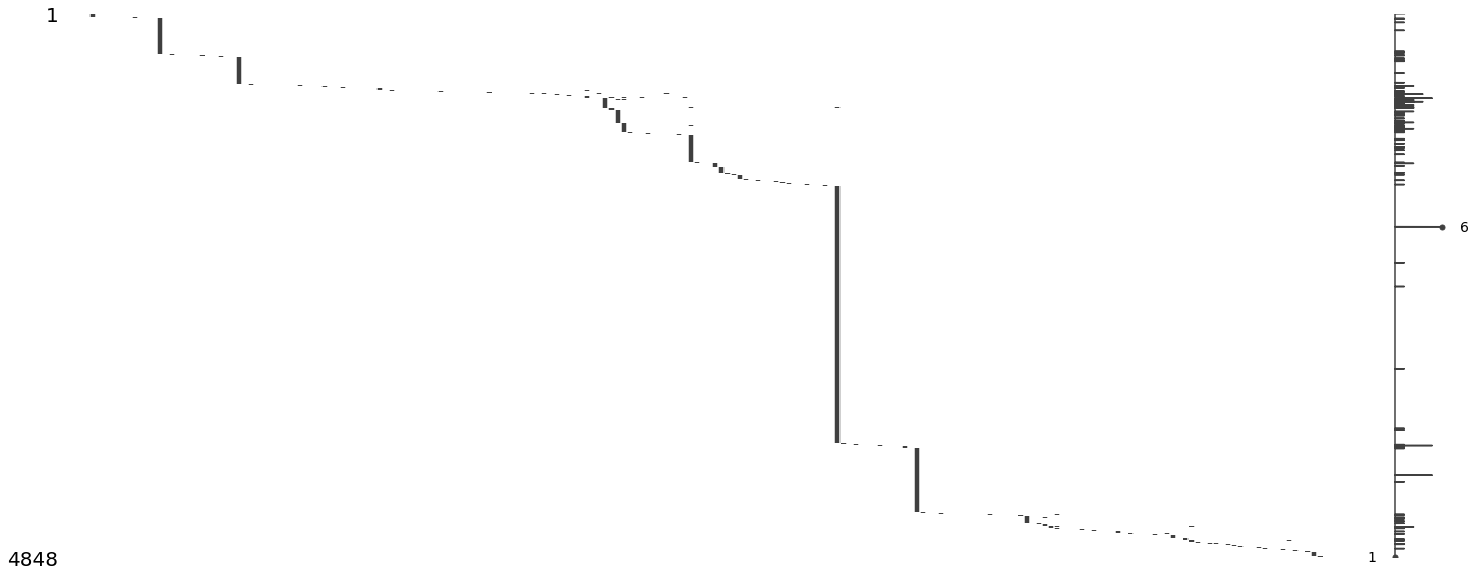

In [5]:
msno.matrix(df)

In [6]:
movie_df=df.stack().reset_index()

In [7]:
movie_df.columns=['User ID','Movie','Rating']
movie_df

,User ID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,AH3QC2PC1VTGP,Movie3,2.0
3,A3LKP6WPMP9UKX,Movie4,5.0
4,AVIY68KEPQ5ZD,Movie4,5.0
...,...,...,...
4995,A1IMQ9WMFYKWH5,Movie206,5.0
4996,A1KLIKPUF5E88I,Movie206,5.0
4997,A5HG6WFZLO10D,Movie206,5.0
4998,A3UU690TWXCG1X,Movie206,5.0


# Which movies have maximum views/ratings?

In [8]:
movie_df['Movie'].value_counts()

Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
            ... 
Movie87        1
Movie45        1
Movie46        1
Movie47        1
Movie1         1
Name: Movie, Length: 206, dtype: int64

In [9]:
movie_df.groupby(['Movie','Rating']).size().sort_values(ascending=False)

Movie     Rating
Movie127  5.0       1512
Movie140  5.0        523
Movie127  1.0        277
          4.0        236
Movie29   5.0        215
                    ... 
Movie183  5.0          1
Movie184  3.0          1
          4.0          1
Movie185  3.0          1
Movie99   5.0          1
Length: 351, dtype: int64

In [10]:
movie_df

,User ID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,AH3QC2PC1VTGP,Movie3,2.0
3,A3LKP6WPMP9UKX,Movie4,5.0
4,AVIY68KEPQ5ZD,Movie4,5.0
...,...,...,...
4995,A1IMQ9WMFYKWH5,Movie206,5.0
4996,A1KLIKPUF5E88I,Movie206,5.0
4997,A5HG6WFZLO10D,Movie206,5.0
4998,A3UU690TWXCG1X,Movie206,5.0


In [11]:
top_watched=movie_df['Movie'].value_counts().index.tolist()
top_watched

['Movie127',
 'Movie140',
 'Movie16',
 'Movie103',
 'Movie29',
 'Movie91',
 'Movie92',
 'Movie89',
 'Movie158',
 'Movie108',
 'Movie107',
 'Movie111',
 'Movie205',
 'Movie182',
 'Movie5',
 'Movie161',
 'Movie185',
 'Movie86',
 'Movie90',
 'Movie184',
 'Movie52',
 'Movie162',
 'Movie173',
 'Movie163',
 'Movie109',
 'Movie206',
 'Movie138',
 'Movie81',
 'Movie117',
 'Movie192',
 'Movie196',
 'Movie186',
 'Movie200',
 'Movie204',
 'Movie119',
 'Movie110',
 'Movie179',
 'Movie43',
 'Movie194',
 'Movie193',
 'Movie114',
 'Movie190',
 'Movie141',
 'Movie202',
 'Movie134',
 'Movie188',
 'Movie160',
 'Movie95',
 'Movie191',
 'Movie118',
 'Movie125',
 'Movie101',
 'Movie189',
 'Movie197',
 'Movie97',
 'Movie12',
 'Movie24',
 'Movie157',
 'Movie113',
 'Movie104',
 'Movie164',
 'Movie121',
 'Movie122',
 'Movie62',
 'Movie124',
 'Movie139',
 'Movie168',
 'Movie174',
 'Movie130',
 'Movie131',
 'Movie169',
 'Movie39',
 'Movie167',
 'Movie85',
 'Movie105',
 'Movie120',
 'Movie40',
 'Movie150',
 'Movi

In [12]:
top_watched_movie=movie_df.groupby(['Rating','Movie']).size().unstack()
top_watched_movie=top_watched_movie[top_watched]
top_watched_movie=pd.DataFrame(top_watched_movie)
top_watched_movie.fillna(0,inplace=True)
top_watched_movie

Movie,Movie127,Movie140,Movie16,Movie103,Movie29,Movie91,Movie92,Movie89,Movie158,Movie108,...,Movie41,Movie100,Movie98,Movie2,Movie42,Movie87,Movie45,Movie46,Movie47,Movie1
Rating,,,,,,,,,,,,,,,,,,,,,
1.0,277.0,7.0,3.0,17.0,4.0,5.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2.0,134.0,5.0,5.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,154.0,10.0,28.0,11.0,3.0,6.0,5.0,6.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,236.0,33.0,71.0,29.0,19.0,10.0,7.0,9.0,4.0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,1512.0,523.0,213.0,215.0,215.0,103.0,87.0,64.0,59.0,42.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [13]:
draw=top_watched_movie.iloc[0:5 , 0:10]
draw.sort_values(by='Rating')

Movie,Movie127,Movie140,Movie16,Movie103,Movie29,Movie91,Movie92,Movie89,Movie158,Movie108
Rating,,,,,,,,,,
1.0,277.0,7.0,3.0,17.0,4.0,5.0,0.0,2.0,1.0,1.0
2.0,134.0,5.0,5.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0
3.0,154.0,10.0,28.0,11.0,3.0,6.0,5.0,6.0,2.0,3.0
4.0,236.0,33.0,71.0,29.0,19.0,10.0,7.0,9.0,4.0,8.0
5.0,1512.0,523.0,213.0,215.0,215.0,103.0,87.0,64.0,59.0,42.0


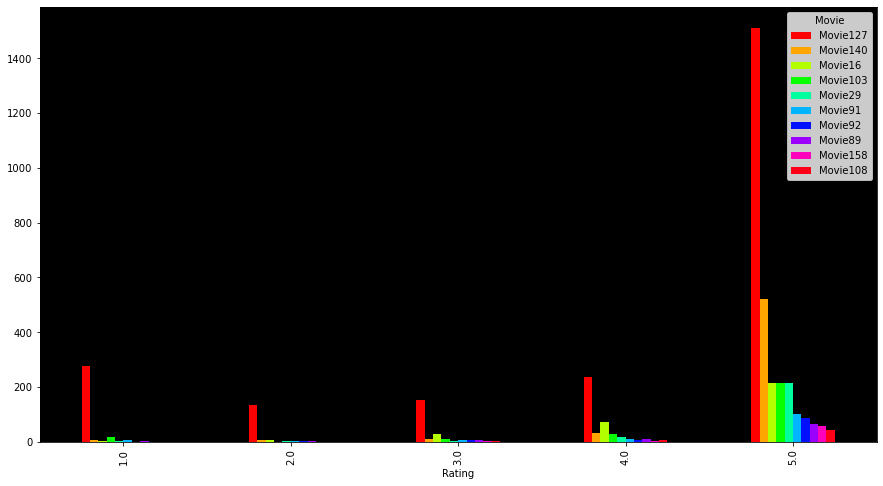

In [14]:
draw.plot(kind='bar',figsize=(15,8),cmap='hsv').set_facecolor('black')

In [15]:
draw

Movie,Movie127,Movie140,Movie16,Movie103,Movie29,Movie91,Movie92,Movie89,Movie158,Movie108
Rating,,,,,,,,,,
1.0,277.0,7.0,3.0,17.0,4.0,5.0,0.0,2.0,1.0,1.0
2.0,134.0,5.0,5.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0
3.0,154.0,10.0,28.0,11.0,3.0,6.0,5.0,6.0,2.0,3.0
4.0,236.0,33.0,71.0,29.0,19.0,10.0,7.0,9.0,4.0,8.0
5.0,1512.0,523.0,213.0,215.0,215.0,103.0,87.0,64.0,59.0,42.0


In [16]:
draw.sum(axis=0) 

Movie
Movie127    2313.0
Movie140     578.0
Movie16      320.0
Movie103     272.0
Movie29      243.0
Movie91      128.0
Movie92      101.0
Movie89       83.0
Movie158      66.0
Movie108      54.0
dtype: float64

In [17]:
top_watched_movie.describe()

Movie,Movie127,Movie140,Movie16,Movie103,Movie29,Movie91,Movie92,Movie89,Movie158,Movie108,...,Movie41,Movie100,Movie98,Movie2,Movie42,Movie87,Movie45,Movie46,Movie47,Movie1
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,462.600000,115.60000,64.000000,54.400000,48.600000,25.60000,20.200000,16.600000,13.200000,10.800000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
std,589.543722,228.02149,87.675538,90.386946,93.280759,43.32782,37.439284,26.660833,25.645662,17.711578,...,0.447214,0.447214,0.447214,0.447214,0.447214,0.447214,0.447214,0.447214,0.447214,0.447214
min,134.000000,5.00000,3.000000,0.000000,2.000000,4.00000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,7.00000,5.000000,11.000000,3.000000,5.00000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,236.000000,10.00000,28.000000,17.000000,4.000000,6.00000,5.000000,6.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,277.000000,33.00000,71.000000,29.000000,19.000000,10.00000,7.000000,9.000000,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1512.000000,523.00000,213.000000,215.000000,215.000000,103.00000,87.000000,64.000000,59.000000,42.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
top_watched_movie.mean()

Movie
Movie127    462.6
Movie140    115.6
Movie16      64.0
Movie103     54.4
Movie29      48.6
            ...  
Movie87       0.2
Movie45       0.2
Movie46       0.2
Movie47       0.2
Movie1        0.2
Length: 206, dtype: float64

In [19]:
movie_df['Rating'].mean()

4.3856

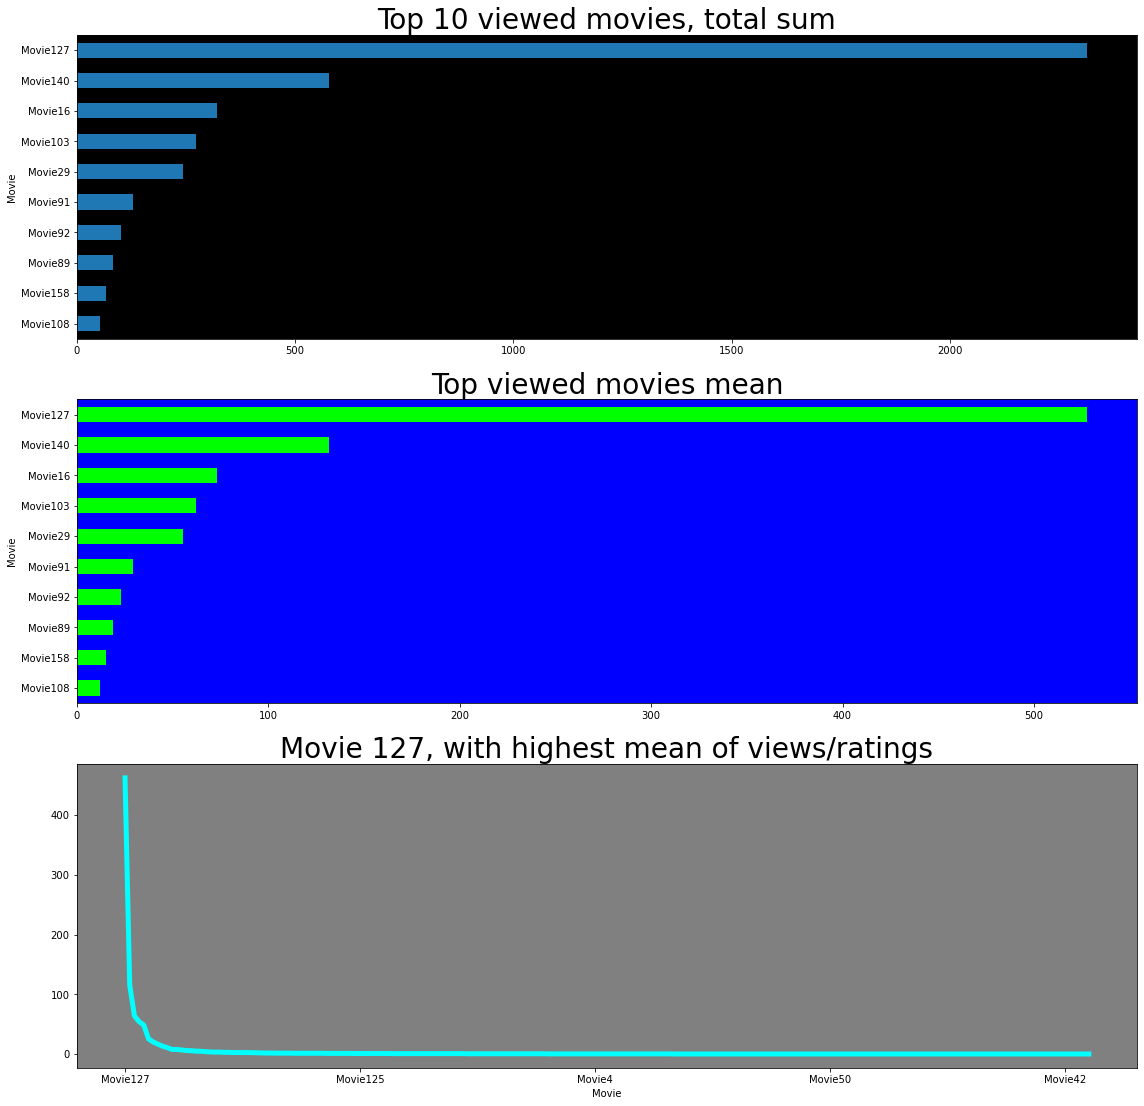

In [20]:
plt.figure(figsize=(19,19))
plt.subplot(3,1,1)
plt.title("Top 10 viewed movies, total sum",size=28)
draw.sum(axis=0).sort_values().plot(kind='barh').set_facecolor('black')
plt.subplot(3,1,2)
plt.title("Top viewed movies mean",size=28)
p=top_watched_movie.sum()/movie_df['Rating'].mean()
p.head(10).sort_values(ascending=True).plot(kind='barh',color='lime').set_facecolor('blue')
plt.subplot(3,1,3)
plt.title("Movie 127, with highest mean of views/ratings",size=28)
top_watched_movie.mean().plot(color='Aqua',linewidth=5.0).set_facecolor('grey')

# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

In [21]:
avg=movie_df.groupby('Movie')['Rating'].mean().sort_values(ascending=False)
avg=pd.DataFrame(avg)
avg.style.set_properties(**{'background-color':'yellow', 'color':'black'})


,Rating
Movie,
Movie1,5.000000
Movie57,5.000000
Movie186,5.000000
Movie183,5.000000
Movie181,5.000000
Movie180,5.000000
Movie18,5.000000
Movie178,5.000000
Movie177,5.000000


In [22]:
avg=movie_df.groupby('Movie')['Rating'].mean().sort_values(ascending=False)
avg=pd.DataFrame(avg)
avg.head(5).style.set_properties(**{'background-color':'grey', 'color':'aqua'})

,Rating
Movie,
Movie1,5.000000
Movie57,5.000000
Movie186,5.000000
Movie183,5.000000
Movie181,5.000000


# Define the top 5 movies with the least audience.

In [23]:
least_audience=movie_df.groupby('Movie')['Rating'].sum().sort_values()
least_audience=pd.DataFrame(least_audience)
least_audience.head().style.set_properties(**{'background-color':'gray','color':'aquamarine'})

,Rating
Movie,
Movie45,1.000000
Movie154,1.000000
Movie58,1.000000
Movie60,1.000000
Movie69,1.000000


In [24]:
df=df.fillna(0)

# MISSING NUMBER MATRIX NOW,

<AxesSubplot:>

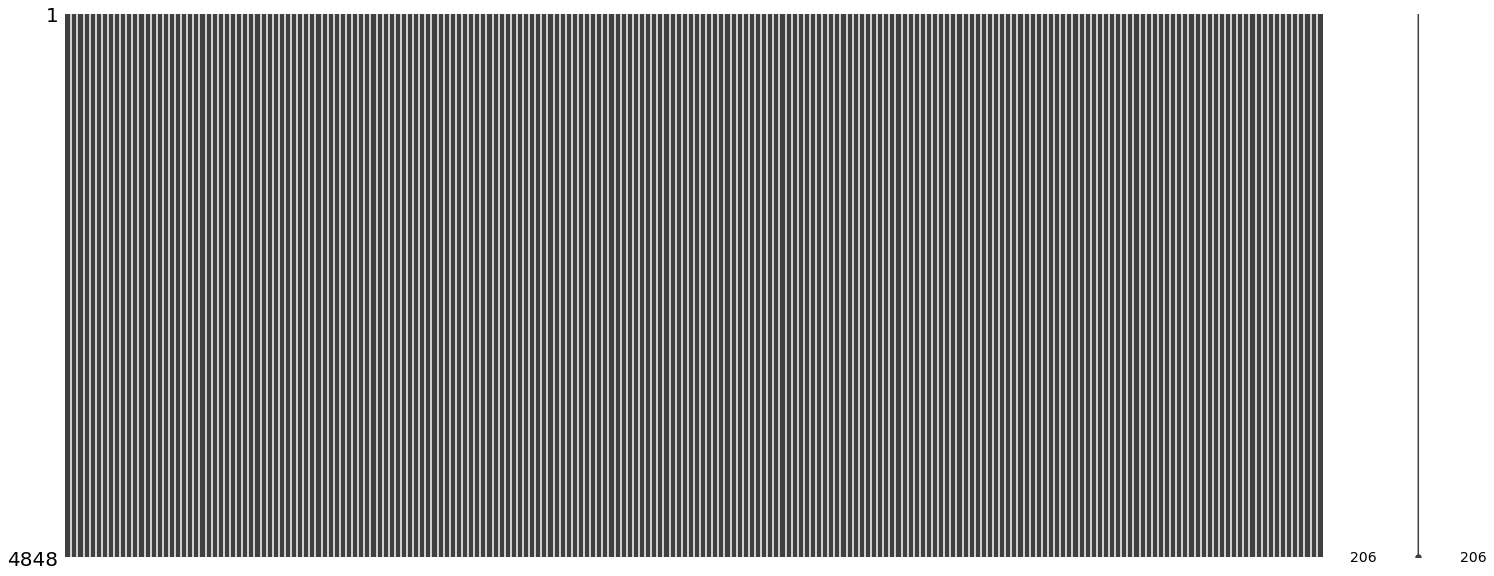

In [25]:
msno.matrix(df)

## Build a recommendation model on training data

In [26]:
def standardization(row):
    """
    Standardization the none rated movies using the  value`s using 
    """
    new_row_value = (row -row.mean())/(row.max()-row.min())
    return new_row_value

In [27]:
movie_rating = df.apply(standardization)

In [28]:
movie_rating

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,0.999794,0.999794,-0.000206,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,-0.00264
AH3QC2PC1VTGP,-0.000206,-0.000206,0.999794,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,-0.00264
A3LKP6WPMP9UKX,-0.000206,-0.000206,-0.000206,0.999587,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,-0.00264
AVIY68KEPQ5ZD,-0.000206,-0.000206,-0.000206,0.999587,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,-0.00264
A1CV1WROP5KTTW,-0.000206,-0.000206,-0.000206,-0.000413,0.995091,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,-0.00264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,-0.000206,-0.000206,-0.000206,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,0.99736
A1KLIKPUF5E88I,-0.000206,-0.000206,-0.000206,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,0.99736
A5HG6WFZLO10D,-0.000206,-0.000206,-0.000206,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.001444,-0.006683,0.99736


In [29]:
movie_similarity = cosine_similarity(movie_rating.T)

In [30]:
movie_similarity

array([[ 1.00000000e+00,  1.00000000e+00, -2.06313183e-04, ...,
        -5.59140306e-04, -1.20232978e-03, -7.43703762e-04],
       [ 1.00000000e+00,  1.00000000e+00, -2.06313183e-04, ...,
        -5.59140306e-04, -1.20232978e-03, -7.43703762e-04],
       [-2.06313183e-04, -2.06313183e-04,  1.00000000e+00, ...,
        -5.59140306e-04, -1.20232978e-03, -7.43703762e-04],
       ...,
       [-5.59140306e-04, -5.59140306e-04, -5.59140306e-04, ...,
         1.00000000e+00, -3.25849773e-03, -2.01555103e-03],
       [-1.20232978e-03, -1.20232978e-03, -1.20232978e-03, ...,
        -3.25849773e-03,  1.00000000e+00, -4.33407679e-03],
       [-7.43703762e-04, -7.43703762e-04, -7.43703762e-04, ...,
        -2.01555103e-03, -4.33407679e-03,  1.00000000e+00]])

In [31]:
movie_similarity_df =pd.DataFrame(movie_similarity,index=df.columns, columns=df.columns)

In [32]:
movie_similarity_df 

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.000000,1.000000,-0.000206,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000430,-0.000292,-0.000206,-0.000581,-0.000349,-0.000478,-0.000206,-0.000559,-0.001202,-0.000744
Movie2,1.000000,1.000000,-0.000206,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000430,-0.000292,-0.000206,-0.000581,-0.000349,-0.000478,-0.000206,-0.000559,-0.001202,-0.000744
Movie3,-0.000206,-0.000206,1.000000,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000430,-0.000292,-0.000206,-0.000581,-0.000349,-0.000478,-0.000206,-0.000559,-0.001202,-0.000744
Movie4,-0.000292,-0.000292,-0.000292,1.000000,-0.001483,-0.000292,-0.000292,-0.000292,-0.000292,-0.000292,...,-0.000609,-0.000413,-0.000292,-0.000821,-0.000494,-0.000676,-0.000292,-0.000791,-0.001701,-0.001052
Movie5,-0.001049,-0.001049,-0.001049,-0.001483,1.000000,-0.001049,-0.001049,-0.001049,-0.001049,-0.001049,...,-0.002188,-0.001483,-0.001049,-0.002952,-0.001775,-0.002430,-0.001049,-0.002842,-0.006111,-0.003780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movie202,-0.000478,-0.000478,-0.000478,-0.000676,-0.002430,-0.000478,-0.000478,-0.000478,-0.000478,-0.000478,...,-0.000997,-0.000676,-0.000478,-0.001346,-0.000809,1.000000,-0.000478,-0.001296,-0.002786,-0.001723
Movie203,-0.000206,-0.000206,-0.000206,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,...,-0.000430,-0.000292,-0.000206,-0.000581,-0.000349,-0.000478,1.000000,-0.000559,-0.001202,-0.000744
Movie204,-0.000559,-0.000559,-0.000559,-0.000791,-0.002842,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,...,-0.001167,-0.000791,-0.000559,-0.001574,-0.000947,-0.001296,-0.000559,1.000000,-0.003258,-0.002016
Movie205,-0.001202,-0.001202,-0.001202,-0.001701,-0.006111,-0.001202,-0.001202,-0.001202,-0.001202,-0.001202,...,-0.002508,-0.001701,-0.001202,-0.003385,-0.002035,-0.002786,-0.001202,-0.003258,1.000000,-0.004334


In [33]:
def recommendation(movie, rating):
    
    """
    This function will make recommendations only based on how 
    users rated products in the past, not based on anything about
    the products themselves.This function will take the movie and
    the rating based that it will give a recommendation.  
    """
    
    similar_value = movie_similarity_df[movie]*(rating)
    similar_value  =  similar_value.sort_values(ascending = False)
    
    return  similar_value

## Make predictions on the test data

In [34]:
print(recommendation("Movie1", 5))

Movie1      5.000000
Movie2      5.000000
Movie180   -0.001032
Movie171   -0.001032
Movie183   -0.001032
              ...   
Movie29    -0.016339
Movie103   -0.017049
Movie16    -0.018784
Movie140   -0.026189
Movie127   -0.061902
Name: Movie1, Length: 206, dtype: float64


In [35]:
print(recommendation("Movie1", 1))

Movie1      1.000000
Movie2      1.000000
Movie180   -0.000206
Movie171   -0.000206
Movie183   -0.000206
              ...   
Movie29    -0.003268
Movie103   -0.003410
Movie16    -0.003757
Movie140   -0.005238
Movie127   -0.012380
Name: Movie1, Length: 206, dtype: float64
